<a href="https://colab.research.google.com/github/RadwanSusan/AI-shape-detector-model/blob/main/shape_detector_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Shape Detector - Google Colab Training

This notebook trains a CNN model to detect basic geometric shapes (circle, square, triangle, rectangle) using GPU acceleration.

## Setup Instructions:
1. **Enable GPU**: Go to `Runtime` → `Change runtime type` → Select `T4 GPU` → Save
2. **Run all cells** in order (Ctrl+F9 or Runtime → Run all)
3. **Download trained model** at the end

---

## 1. Check GPU Availability

In [18]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")
else:
    print("⚠️ GPU not available. Go to Runtime → Change runtime type → Select GPU")

PyTorch version: 2.8.0+cu126
CUDA available: True
GPU: Tesla T4
GPU Memory: 15.83 GB


## 2. Clone Repository from GitHub

In [19]:
# Clone your GitHub repository
!git clone https://github.com/RadwanSusan/AI-shape-detector-model.git
%cd AI-shape-detector-model

Cloning into 'AI-shape-detector-model'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 27 (delta 2), reused 6 (delta 2), pack-reused 21 (from 2)
Receiving objects: 100% (27/27), 172.81 MiB | 39.80 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (15/15), done.
/content/AI-shape-detector-model/src/AI-shape-detector-model/src/AI-shape-detector-model


## 3. Install Dependencies

In [20]:
!pip install -q -r requirements.txt
print("✓ Dependencies installed!")

✓ Dependencies installed!


## 4. Generate Synthetic Dataset

This will create 6,000 shape images (1,500 per class)

In [21]:
%cd src
!python generate_data.py
print("\n✓ Dataset generated!")

/content/AI-shape-detector-model/src/AI-shape-detector-model/src/AI-shape-detector-model/src
Generating 6000 total images...
Classes: ['circle', 'square', 'triangle', 'rectangle']

Generating circles...
  train: 100% 1050/1050 [00:04<00:00, 262.13it/s]
  val: 100% 225/225 [00:00<00:00, 285.08it/s]
  test: 100% 225/225 [00:00<00:00, 291.24it/s]

Generating squares...
  train: 100% 1050/1050 [00:06<00:00, 161.64it/s]
  val: 100% 225/225 [00:01<00:00, 144.96it/s]
  test: 100% 225/225 [00:01<00:00, 136.51it/s]

Generating triangles...
  train: 100% 1050/1050 [00:04<00:00, 245.21it/s]
  val: 100% 225/225 [00:01<00:00, 198.27it/s]
  test: 100% 225/225 [00:01<00:00, 187.05it/s]

Generating rectangles...
  train: 100% 1050/1050 [00:03<00:00, 276.88it/s]
  val: 100% 225/225 [00:00<00:00, 255.83it/s]
  test: 100% 225/225 [00:00<00:00, 269.01it/s]

✓ Dataset generation complete!
  Train: 4200 images
  Val:   900 images
  Test:  900 images
  Total: 6000 images

✓ Dataset generated!


## 5. Preview Sample Images

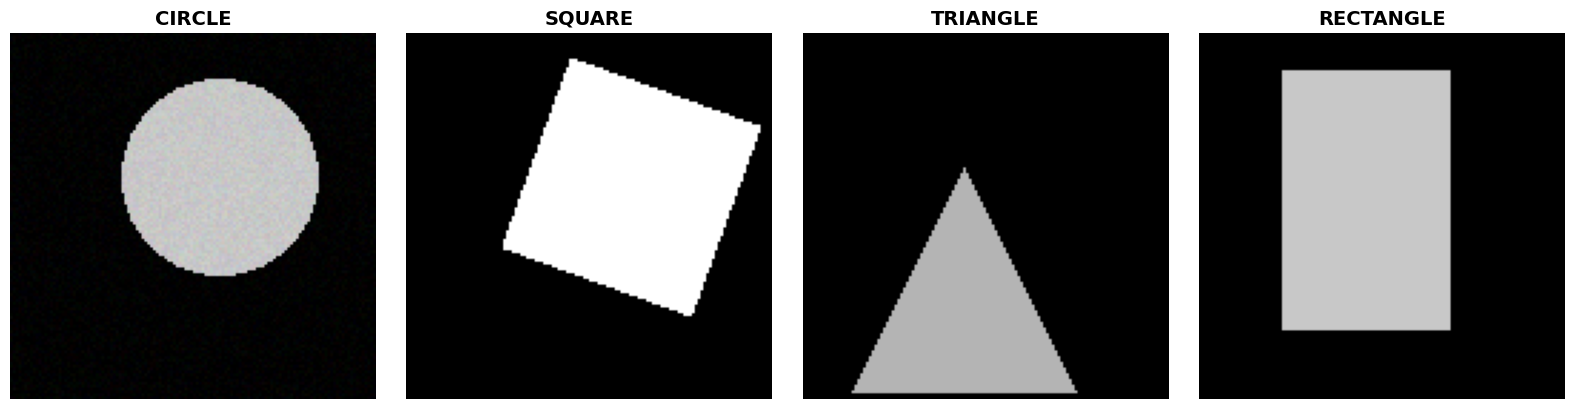

In [22]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import glob

shapes = ['circle', 'square', 'triangle', 'rectangle']
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for idx, shape in enumerate(shapes):
    # Get first image file from the shape folder
    shape_dir = f'data/train/{shape}'
    image_files = glob.glob(f'{shape_dir}/*.png')

    if image_files:
        img_path = image_files[0]  # Use first available image
        img = Image.open(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(shape.upper(), fontsize=14, fontweight='bold')
        axes[idx].axis('off')
    else:
        print(f"No images found in {shape_dir}")

plt.tight_layout()
plt.show()

## 6. Train the Model

Training with GPU acceleration (should take 1-3 minutes for 20 epochs)

In [23]:
# Train for 20 epochs with GPU
!python train.py
print("\n✓ Training complete!")

Using device: cuda
Training samples: 4200
Validation samples: 900
Classes: ['circle', 'rectangle', 'square', 'triangle']
Batch size: 32
Model created with 8,483,588 trainable parameters

Starting training for 5 epochs...

Epoch [1/5]
Training: 100% 132/132 [00:08<00:00, 14.83it/s, loss=1.5541, acc=56.71%]
Validation: 100% 29/29 [00:01<00:00, 23.02it/s, loss=0.7039, acc=72.89%]
  Train Loss: 1.5423 | Train Acc: 56.71%
  Val Loss:   0.6796 | Val Acc:   72.89%
  ✓ Best model saved (Val Acc: 72.89%)

Epoch [2/5]
Training: 100% 132/132 [00:07<00:00, 18.22it/s, loss=0.5904, acc=74.48%]
Validation: 100% 29/29 [00:01<00:00, 27.96it/s, loss=0.4189, acc=83.00%]
  Train Loss: 0.5904 | Train Acc: 74.48%
  Val Loss:   0.4045 | Val Acc:   83.00%
  ✓ Best model saved (Val Acc: 83.00%)

Epoch [3/5]
Training: 100% 132/132 [00:07<00:00, 18.24it/s, loss=0.4179, acc=81.74%]
Validation: 100% 29/29 [00:01<00:00, 27.94it/s, loss=0.2182, acc=90.33%]
  Train Loss: 0.4179 | Train Acc: 81.74%
  Val Loss:   0.210

## 7. View Training History

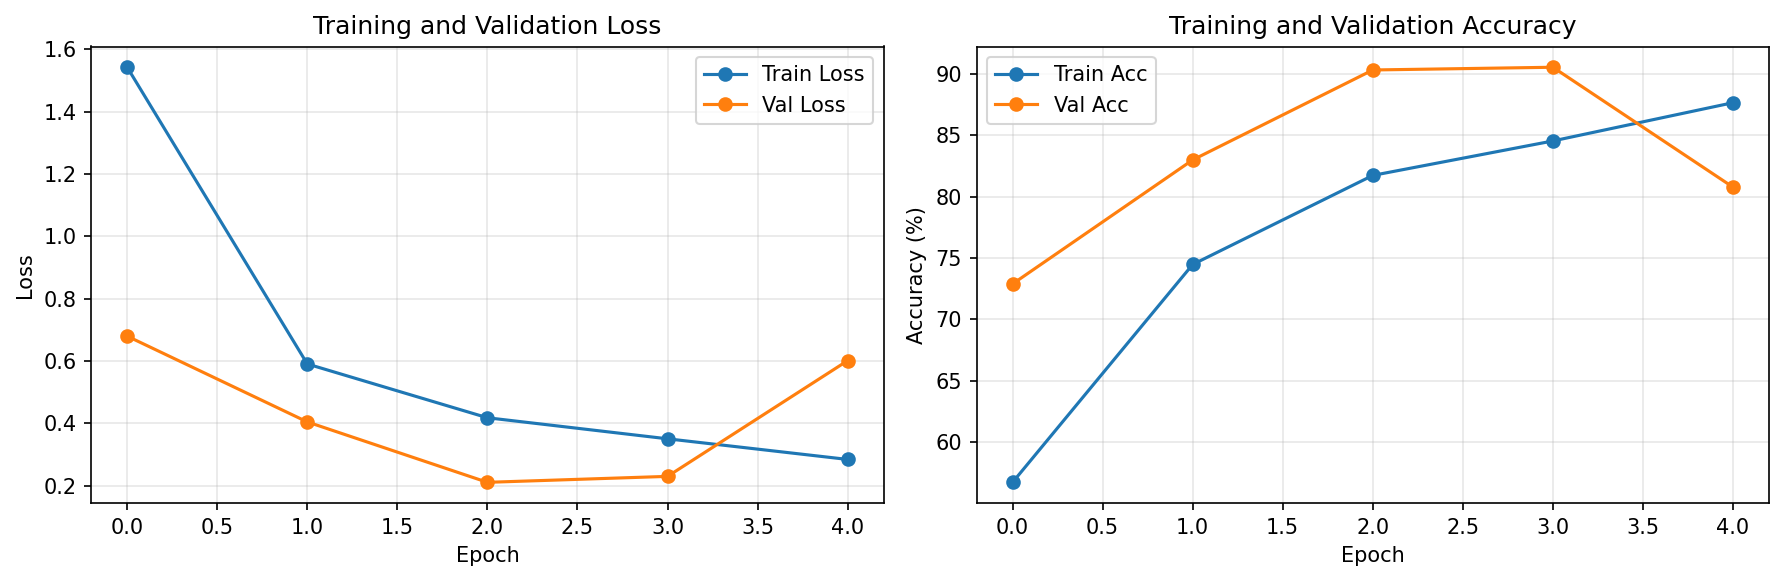

In [24]:
from IPython.display import Image as IPImage
display(IPImage(filename='results/training_history.png'))

## 8. Evaluate Model on Test Set

In [25]:
!python evaluate.py

Using device: cuda

Model loaded from models/best_model.pth
Classes: ['circle', 'rectangle', 'square', 'triangle']
Test samples: 900

Evaluating model on test set...

Evaluating: 100% 29/29 [00:01<00:00, 21.98it/s, acc=90.00%]

Test Accuracy: 90.00%

Classification Report:
              precision    recall  f1-score   support

      circle     0.8780    0.9911    0.9311       225
   rectangle     0.8058    0.8667    0.8351       225
      square     0.9489    0.7422    0.8329       225
    triangle     0.9868    1.0000    0.9934       225

    accuracy                         0.9000       900
   macro avg     0.9049    0.9000    0.8981       900
weighted avg     0.9049    0.9000    0.8981       900


Confusion Matrix:
[[223   1   0   1]
 [ 20 195   9   1]
 [ 11  46 167   1]
 [  0   0   0 225]]
Confusion matrix saved to results/confusion_matrix.png

Generating sample predictions...
Sample predictions saved to results/sample_predictions.png

Evaluation complete!


## 9. View Evaluation Results

Confusion Matrix:


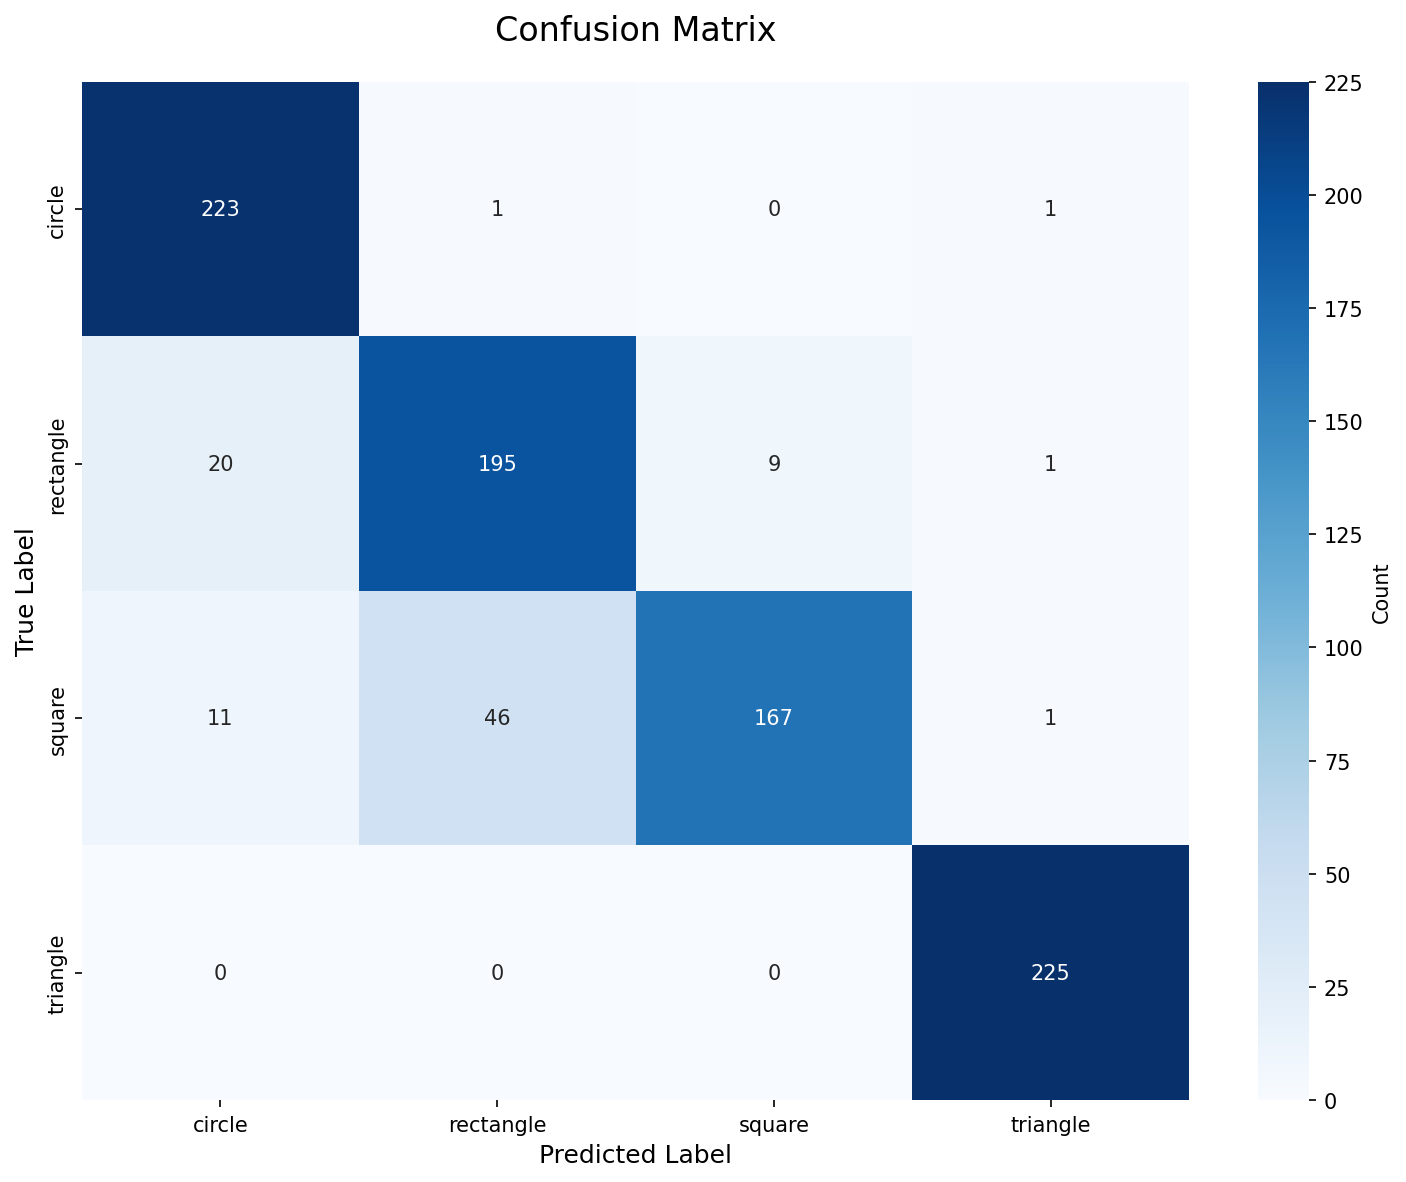


Sample Predictions:


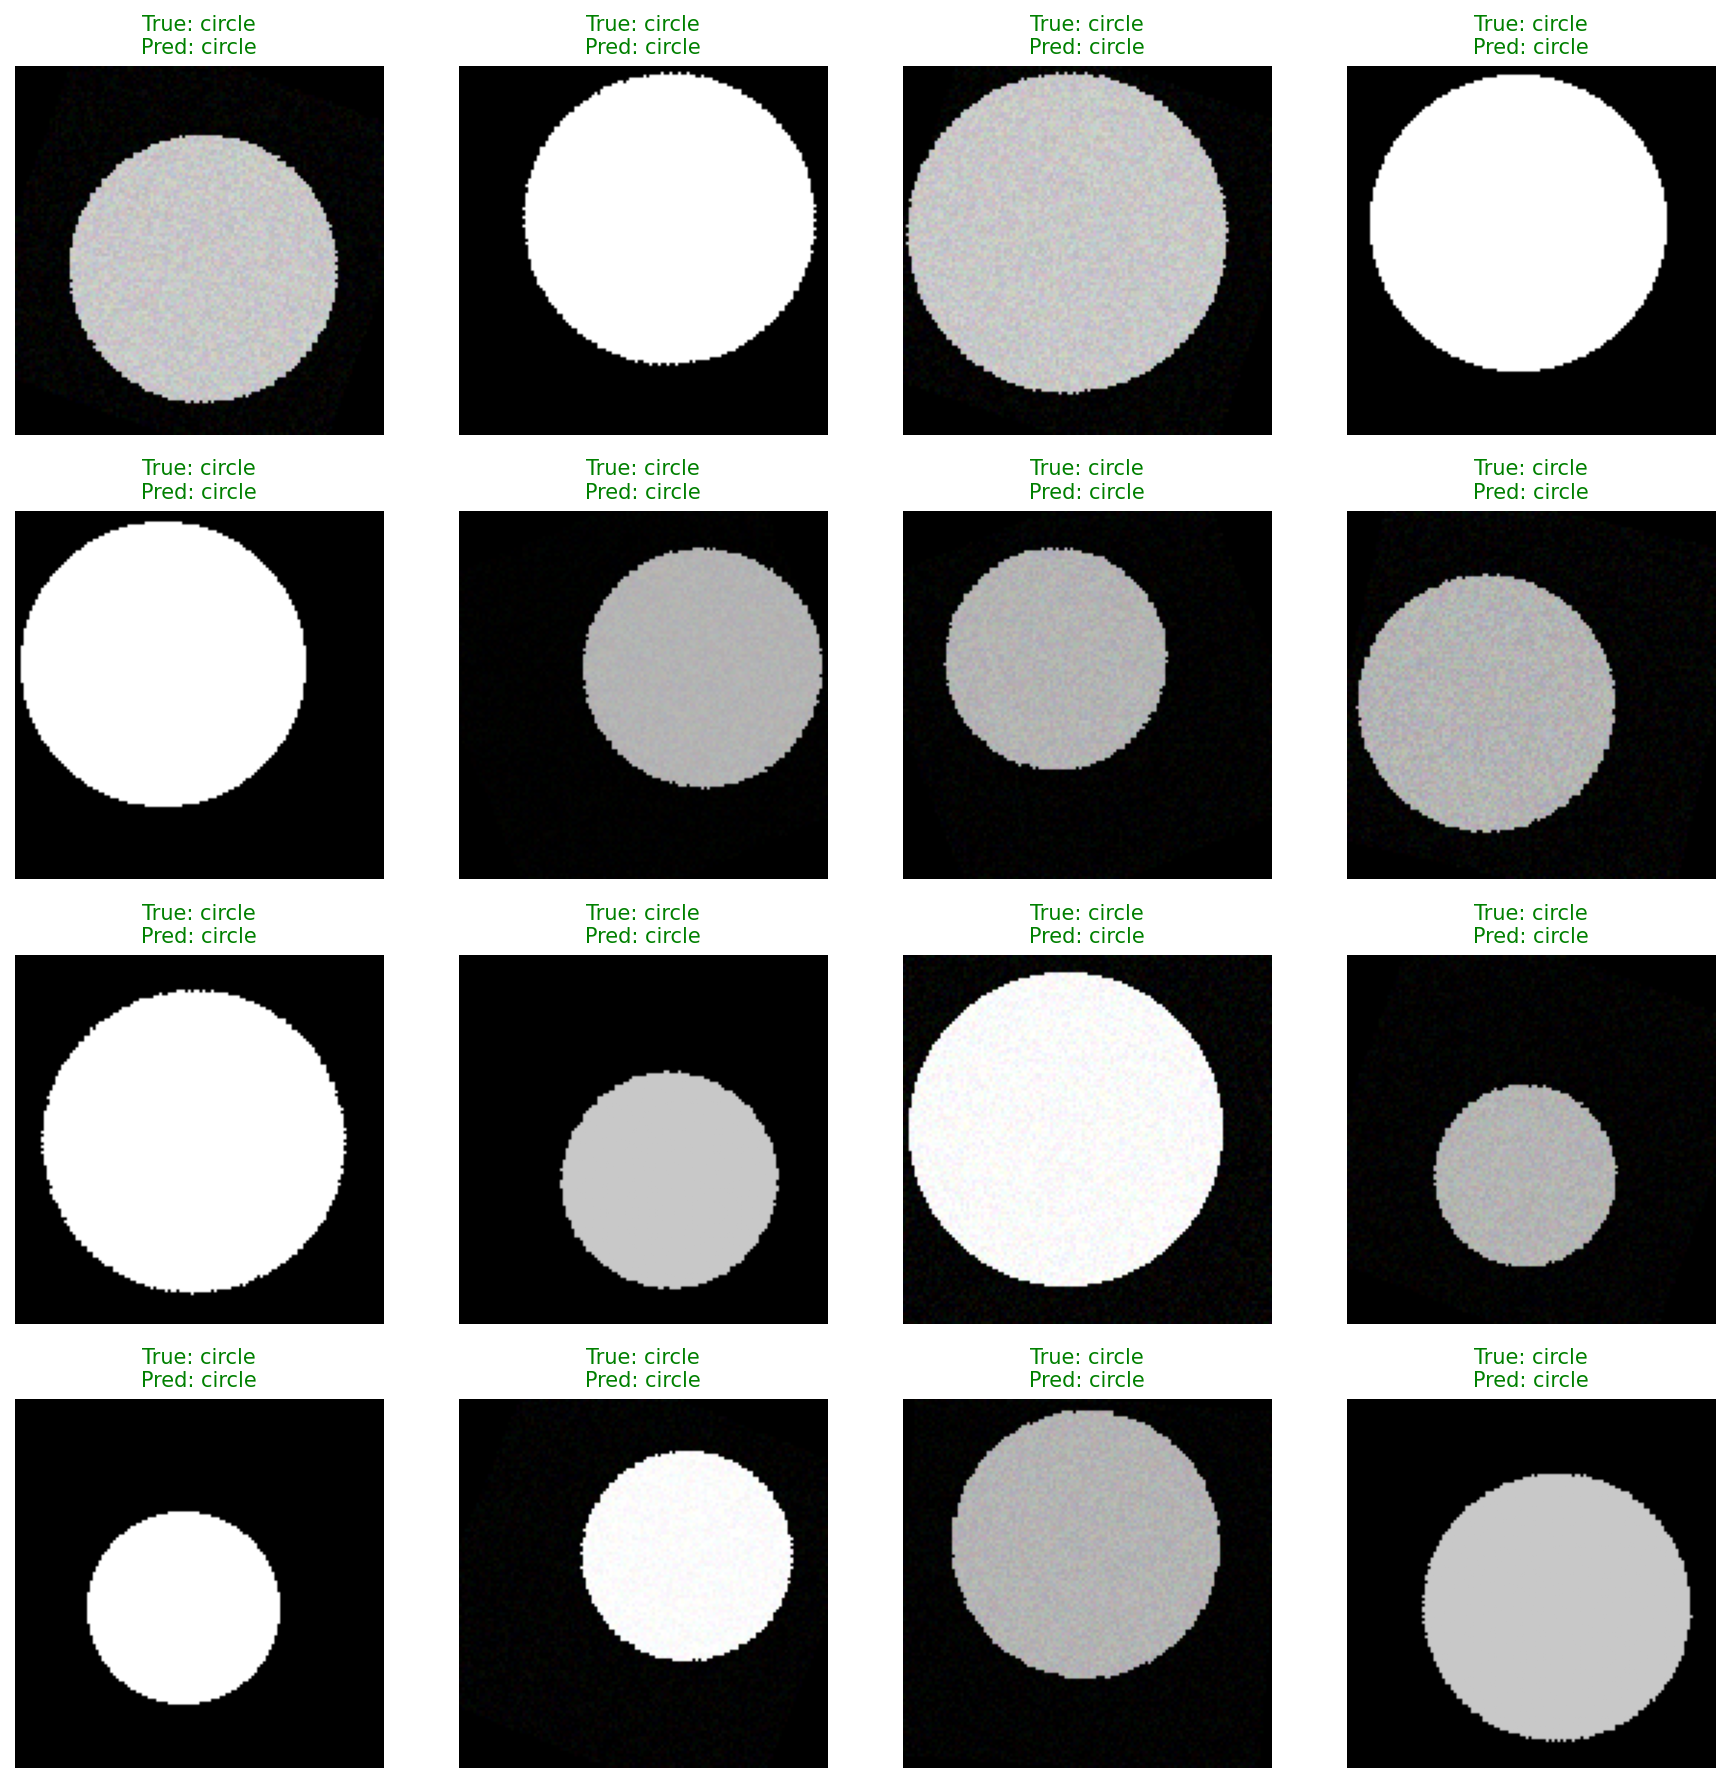

In [26]:
# Display confusion matrix
from IPython.display import Image as IPImage
print("Confusion Matrix:")
display(IPImage(filename='results/confusion_matrix.png'))

print("\nSample Predictions:")
display(IPImage(filename='results/sample_predictions.png'))

## 10. Test Predictions on Custom Images

Using device: cuda
Loading model from models/best_model.pth...
Model loaded. Classes: ['circle', 'rectangle', 'square', 'triangle']

Found 225 images. Processing...

circle_0163.png                -> circle     (99.87%)
circle_0039.png                -> circle     (99.04%)
circle_0071.png                -> circle     (99.83%)
circle_0159.png                -> circle     (99.96%)
circle_0041.png                -> circle     (100.00%)
circle_0151.png                -> circle     (99.98%)
circle_0207.png                -> circle     (100.00%)
circle_0009.png                -> circle     (100.00%)
circle_0221.png                -> circle     (77.49%)
circle_0198.png                -> circle     (99.98%)
circle_0150.png                -> circle     (99.99%)
circle_0143.png                -> circle     (100.00%)
circle_0083.png                -> circle     (100.00%)
circle_0084.png                -> circle     (100.00%)
circle_0011.png                -> circle     (98.14%)
circle_0000.png   

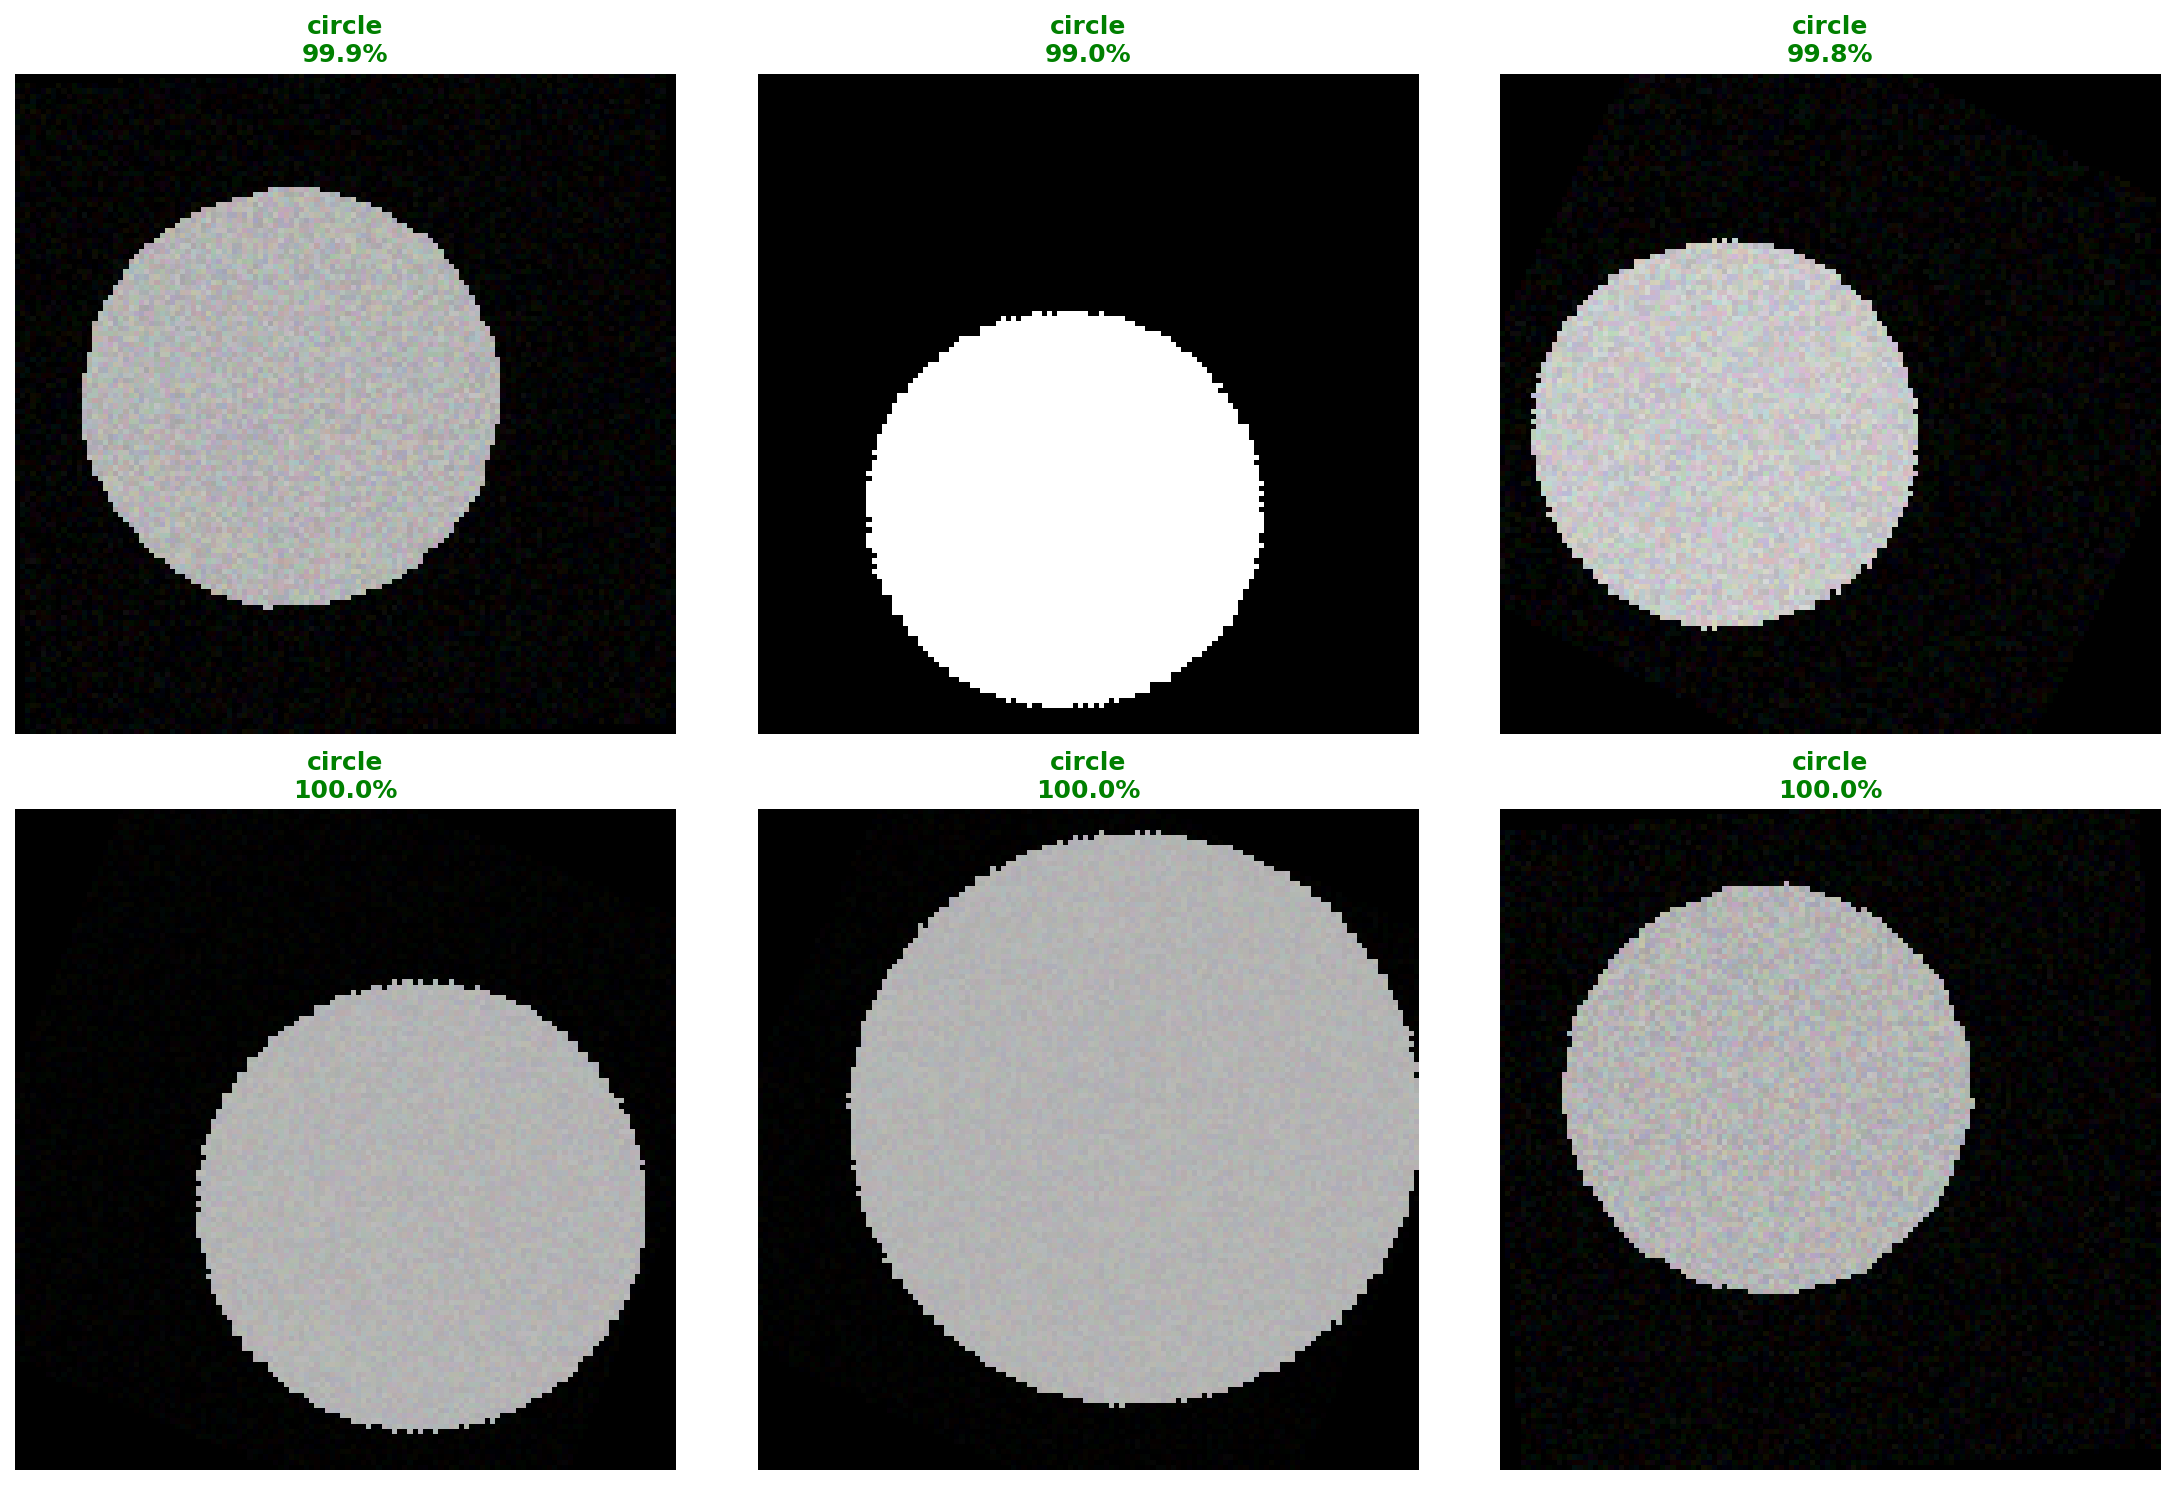

In [27]:
# Test on a few images from test set
!python predict.py --dir data/test/circle --save

# Display results
from IPython.display import Image as IPImage
display(IPImage(filename='results/predictions/batch_predictions.png'))

## 11. Upload Your Own Image to Test

Upload an image with a shape (circle, square, triangle, or rectangle):


Saving image.png to image.png

Testing on: image.png
Using device: cuda
Loading model from models/best_model.pth...
Model loaded. Classes: ['circle', 'rectangle', 'square', 'triangle']

Predicting shape in image.png...

Prediction: SQUARE
Confidence: 100.00%
Visualization saved to results/prediction_image.png


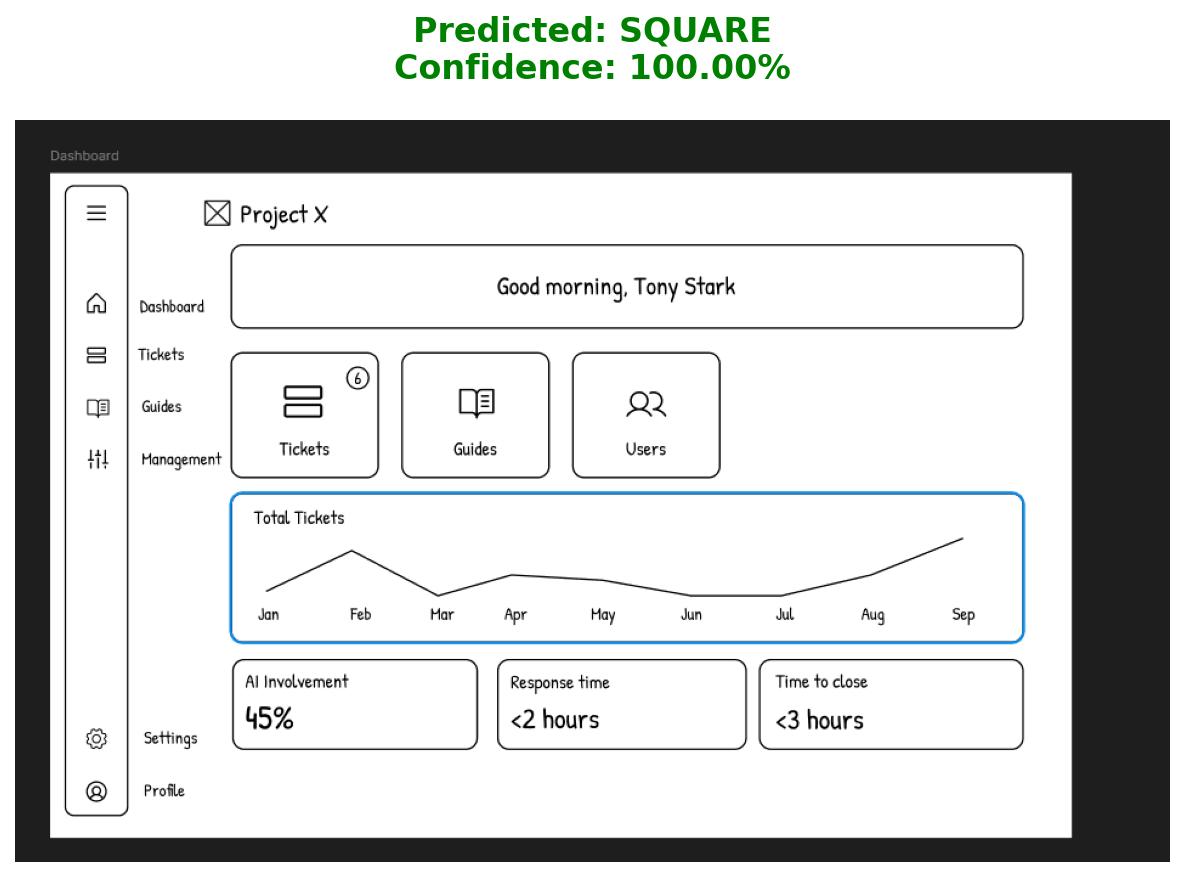

In [28]:
from google.colab import files
import os

# Upload an image
print("Upload an image with a shape (circle, square, triangle, or rectangle):")
uploaded = files.upload()

# Get the uploaded filename
if uploaded:
    filename = list(uploaded.keys())[0]
    print(f"\nTesting on: {filename}")

    # Make prediction
    !python predict.py --image {filename} --save

    # Display result
    from IPython.display import Image as IPImage
    result_path = f'results/prediction_{filename}'
    if os.path.exists(result_path):
        display(IPImage(filename=result_path))

## 12. Model Information

In [29]:
import torch
from model import ShapeDetectorCNN

# Load model
checkpoint = torch.load('models/best_model.pth', map_location='cpu')
model = ShapeDetectorCNN(num_classes=4)
model.load_state_dict(checkpoint['model_state_dict'])

print("Model Architecture:")
print("="*60)
print(model)
print("\n" + "="*60)
print(f"Total Parameters: {model.count_parameters():,}")
print(f"Classes: {checkpoint['class_names']}")
print(f"Best Validation Accuracy: {checkpoint['val_acc']:.2f}%")

Model Architecture:
ShapeDetectorCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=32768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=4, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Total Parameters: 8,483,588
Classes: ['circle', 'rectangle', 'square', 'triangle']
Best Validation Accuracy: 90.56%


## 13. Download Trained Model

Download the trained model to use locally on your computer

In [30]:
from google.colab import files
import shutil

# Create a zip with model and results
!zip -r model_and_results.zip models results

print("Downloading trained model and results...")
files.download('model_and_results.zip')
print("✓ Download complete!")

  adding: models/ (stored 0%)
  adding: models/best_model.pth (deflated 11%)
  adding: models/final_model.pth (deflated 11%)
  adding: results/ (stored 0%)
  adding: results/training_history.png (deflated 8%)
  adding: results/predictions/ (stored 0%)
  adding: results/predictions/batch_predictions.png (deflated 9%)
  adding: results/sample_predictions.png (deflated 1%)
  adding: results/confusion_matrix.png (deflated 22%)
  adding: results/prediction_image.png (deflated 14%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✓ Download complete!


## Next Steps

### To use the model locally:
1. Extract the downloaded `model_and_results.zip`
2. Copy the `models/` folder to your local project
3. Run predictions: `python predict.py --image your_image.png`

### To improve the model:
- Generate more training data (increase `num_samples_per_class`)
- Train for more epochs
- Add data augmentation
- Try different model architectures
- Add more shape classes

### Resources:
- GitHub: https://github.com/RadwanSusan/AI-shape-detector-model
- PyTorch Docs: https://pytorch.org/docs/
- Colab Docs: https://colab.research.google.com/

---
**Happy Training! 🎓🚀**